/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

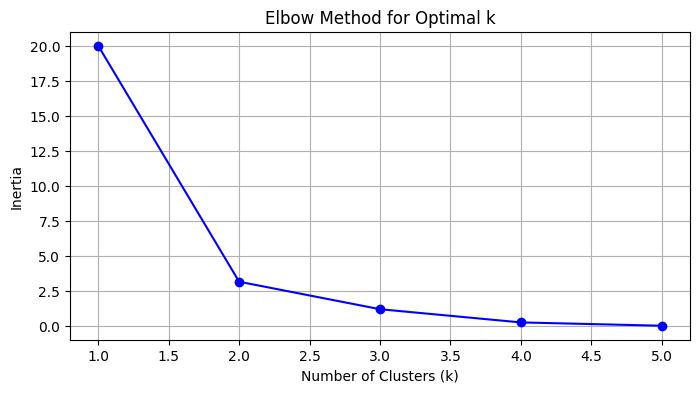

/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


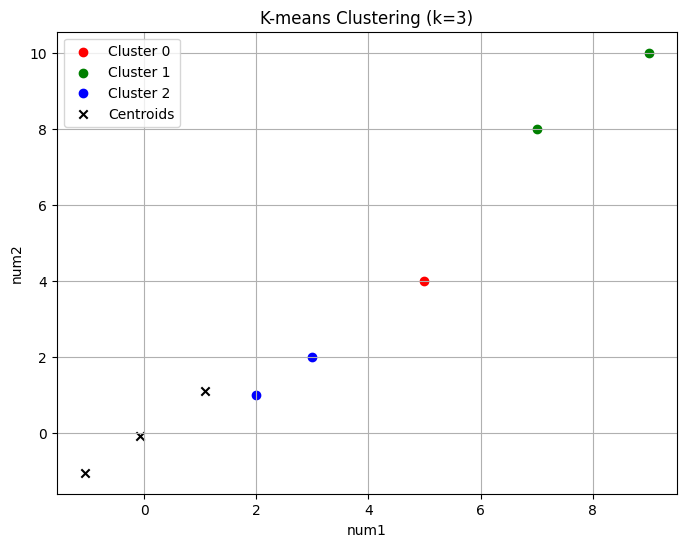

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a DataFrame from the given data
data = {
    'num0': ['2', '5', '3', '9', '7'],
    'num1': ['2', '5', '3', '9', '7'],
    'num2': ['1', '4', '2', '10', '8'],
    'num3': ['1', '4', '2', '10', '8']
}
df = pd.DataFrame(data)

# Convert columns to numeric
df['num1'] = pd.to_numeric(df['num1'])
df['num0'] = pd.to_numeric(df['num0'])
df['num2'] = pd.to_numeric(df['num2'])
df['num3'] = pd.to_numeric(df['num3'])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow method, select the optimal value of k (e.g., k=3 in this case)
optimal_k = 3

# Perform K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for cluster_num in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['num1'], cluster_data['num2'], c=colors[cluster_num], label=f'Cluster {cluster_num}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='k', marker='x', label='Centroids')
plt.xlabel('num1')
plt.ylabel('num2')
plt.title(f'K-means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
